In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import codecs
import glob
CBMA=pd.read_excel("CBMA_01092017.xlsx", header=None)
CBMA.columns=["Acte inédit","Analyse CBMA","Analyse édition","Annotations","Auteur abbaye hommes/femmes","Auteur Code Fonction","Auteur Ordre religieux","Auteur Rubrique cumulative","Auteur Vita Lieu","Auteur Vita Nom","AuteurLieu","AuteurNom","authenticité","autorisation de publication","base CartulR","bénéficiaire abbaye hommes/femmes","Bénéficiaire Code Fonction","Bénéficiaire Ordre religieux","Bénéficiaire Rubrique cumulative","BénéficiaireLieu","BénéficiaireNom","BHL","Chagal après","Chagal avant","Chagal Date approximative","Chagal date précise","Chagal Fourchette conjecture","Charcis","chirographie","date du saint","Date édition","Date retenue","Date revue","DateModification","DatePondération","Dernière mise à jour","Diocèse","Diocèse de redaction Vita","fiche documentée","Genre","Hauteur en mm","Id BHL","Institution promotrice","Institution promotrice X","Institution promotrice Y","Jour","jour de la semaine","L en mm","Langue","Lien web","Lieu de l'acte","Lieu identification","mentions dorsales et autres","Mis à jour par","Mois","NP balisés","NPL","NPP","Numéro Artem","Numéro CBMA","Numéro d'ordre","Numéros liés","préambule","Référence édition","responsable","saint","Saint Fonction","saint genre","saint ordre","type de mort","source de l'édition. Type","support","termes de donation","Terminus a quo","Terminus ante quem","Texte","Texte manquant","Titre édition","Tradition","Type","Typologie1","Typologie2","Variante","Vita coordonnees X","Vita coordonnees Y","X","Y"]

In [2]:
CBMA1=CBMA[["Terminus a quo", "Texte", "Genre", "Numéro CBMA"]]

In [3]:
big={}
for filename in glob.glob("BRUEL_todos_g\*txt"):
    try:
        nombre=filename.split("CBMA_", 2)[1]
        #nombre=filename.split("_", 4)[4]
        nombre_1=nombre.split(".", 2)[0]
        big[str(nombre_1)]=pd.read_table(str(filename), header=None)
    except:
        continue

In [4]:
big2={}
for k, v in big.items():
    big2[k]=[]
    caja=[]
    for index, elem in enumerate(v[0].astype(str)):
        if len(elem)>2:
            if v[1][index]=="VBE" or v[1][index]=="SUB":
                caja.append(elem)
    big2[k].extend(caja)
    if int(k)%2000==0:
        print(k)

4000
6000


In [3]:
CDBE={}
for filename in glob.glob("CDBE\DIPLO_BELGA_CRF\*txt"):
    try:
        nombre=filename.split("CDBE\DIPLO_BELGA_CRF\\", 2)[1]
        nombre1=nombre.split(".html", 2)[0]
        CDBE[str(nombre1)]=pd.read_table(str(filename), header=None)
    except:
        continue

In [14]:
CDLM={}
for filename in glob.glob("CDLM\CDLM_CRF\*txt"):
    try:
        nombre=filename.split("CDLM\CDLM_CRF\\", 2)[1]
        nombre1=nombre.split(".txt", 2)[0]
        CDLM[str(nombre1)]=pd.read_table(str(filename), header=None)
    except:
        continue

In [6]:
n=0
CDBE2={}
for k, v in CDBE.items():
    n+=1
    CDBE2[k]=[]
    caja=[]
    for index, elem in enumerate(v[0].astype(str)):
        if len(elem)>2:
            if v[1][index]=="VBE" or v[1][index]=="SUB":
                caja.append(elem)
    CDBE2[k].extend(caja)
    if int(n)%4000==0:
        print(n)

4000
8000
12000
16000


In [7]:
#LIMITE DE LA CARGA DE ARCHIVOS

In [8]:
almacen=[(CBMA.loc[CBMA["Numéro CBMA"]==int(k)]["Genre"].iloc[0], k," ".join(v)) for k,v in big2.items()]
almacen=pd.DataFrame(almacen, columns=["Type", "Numéro CBMA", "Texte"])
almacen['category_id'] = almacen['Type'].factorize()[0]

In [9]:
almacen = almacen[pd.notnull(almacen['Type'])]
counts = almacen['Type'].value_counts()
almacen= almacen[~almacen['Type'].isin(counts[counts < 20].index)]


category_id_df = almacen[['Type', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Type']].values)
almacen.head()

Type Numéro CBMA                                              Texte  \
0  diplôme        1415  Dei gratia imperator fauentibus salutem amorem...   
1   notice        1416  Noticia hominibus subterfirmauerunt resideret ...   
2   charte        1420  Dominus feminam propagandam multitudinem filio...   
3   notice        1421  Domino fratribus Uuandalgerio uxore Gonteldis ...   
4   charte        1422  filiolo Ariaudo Dei nomine Airsenda femina don...   

   category_id  
0            0  
1            1  
2            2  
3            1  
4            2

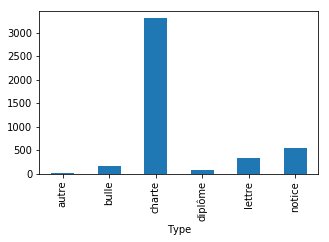

In [10]:
fig = plt.figure(figsize=(5,3))
almacen.groupby('Type').Texte.count().plot.bar(ylim=0)
plt.show()

In [11]:
#CORPUS BELGA

In [11]:
nuevo2=pd.read_csv('nuevo_CDBE.csv', index_col=0)

In [12]:
almacen5=[(nuevo2.loc[nuevo2["ID"]==k+".html"]["Type"].iloc[0], k," ".join(v)) for k,v in CDBE2.items()]

In [13]:
almacen5=pd.DataFrame(almacen5, columns=["Type", "ID", "Texte"])
almacen5['category_id'] = almacen5['Type'].factorize()[0]

In [14]:
almacen5 = almacen5[pd.notnull(almacen5['Type'])]
counts = almacen5['Type'].value_counts()
almacen5= almacen5[~almacen5['Type'].isin(counts[counts < 11].index)]

In [15]:
y=[]
aborto=[("charte", 2), ("notice", 1), ("bulle", 4), ("lettre", 6), ("diplôme", 0), ("autre", 3)]
for i,row in almacen5.iterrows():
    for x in aborto:
        if row[0]==x[0]:
            y.append(str(x[1]))
            break

In [16]:
almacen5 = almacen5.reset_index(drop=True)
almacen5["aborto"]=pd.DataFrame(y)
almacen5["aborto"] = almacen5["aborto"].astype(int)

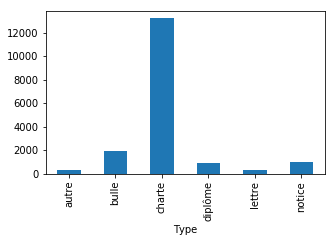

In [17]:
fig = plt.figure(figsize=(5,3))
almacen5.groupby('Type').Texte.count().plot.bar(ylim=0)
plt.show()

In [18]:
#CLUNY
almacen.groupby(["Type", "category_id"]).size()

Type     category_id
autre    3                24
bulle    4               173
charte   2              3303
diplôme  0                88
lettre   6               339
notice   1               540
dtype: int64

In [19]:
#BELGICA
almacen6.groupby(["Type", "category_id"]).size()

NameError: name 'almacen6' is not defined

In [30]:
almacen5 = almacen5.drop('category_id', axis=1)

In [31]:
almacen5.rename(columns={'aborto':'category_id'}, inplace=True)

In [23]:
#LIMITE DE LA EDICION DE ARCHIVOS

In [24]:
almacen.head()

Type Numéro CBMA                                              Texte  \
0  diplôme        1415  Dei gratia imperator fauentibus salutem amorem...   
1   notice        1416  Noticia hominibus subterfirmauerunt resideret ...   
2   charte        1420  Dominus feminam propagandam multitudinem filio...   
3   notice        1421  Domino fratribus Uuandalgerio uxore Gonteldis ...   
4   charte        1422  filiolo Ariaudo Dei nomine Airsenda femina don...   

   category_id  
0            0  
1            1  
2            2  
3            1  
4            2

In [32]:
almacen5.head()

Type         ID                                              Texte  \
0  charte     CDBE_1  nomine trinitatis patris filii spiritus Debemu...   
1  charte    CDBE_10  nomine trinitatis dei patientia episcopus appr...   
2  charte   CDBE_100  regina comitissa legentibus audientibus salute...   
3  notice  CDBE_1000  Iuuainus Hermenelgem dedit ecclesie elemosinam...   
4  notice  CDBE_1001  Gosin Frat dedit ecclesie pratum Marcam loco d...   

   category_id  
0            2  
1            2  
2            2  
3            1  
4            1

In [79]:
#OPCIONAL, quitar las cartas al corpus belga
aleatorio=[index for index, row in almacen5.iterrows() if row[0]=="charte"]
aleatorio2=random.sample(aleatorio, 5500)
aleatorio2.sort()
almacen6=almacen5.drop(aleatorio2,axis=0)
almacen6.head()


Type         ID                                              Texte  \
0  charte     CDBE_1  nomine trinitatis patris filii spiritus Debemu...   
1  charte    CDBE_10  nomine trinitatis dei patientia episcopus appr...   
2  charte   CDBE_100  regina comitissa legentibus audientibus salute...   
3  notice  CDBE_1000  Iuuainus Hermenelgem dedit ecclesie elemosinam...   
4  notice  CDBE_1001  Gosin Frat dedit ecclesie pratum Marcam loco d...   

   category_id  
0            2  
1            2  
2            2  
3            1  
4            1

In [80]:
cruzada=pd.concat([almacen[["Type", "Texte", "category_id"]], almacen6[["Type", "Texte", "category_id"]]], ignore_index=True)

In [81]:
category_id_df = almacen[['Type', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Type']].values)

In [82]:
category_id_df = cruzada[['Type', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Type']].values)

In [83]:
cruzada.head()

Type                                              Texte  category_id
0  diplôme  Dei gratia imperator fauentibus salutem amorem...            0
1   notice  Noticia hominibus subterfirmauerunt resideret ...            1
2   charte  Dominus feminam propagandam multitudinem filio...            2
3   notice  Domino fratribus Uuandalgerio uxore Gonteldis ...            1
4   charte  filiolo Ariaudo Dei nomine Airsenda femina don...            2

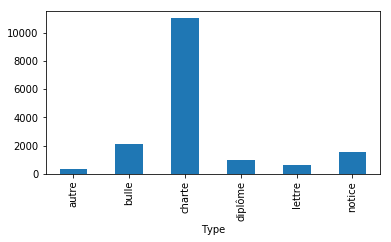

In [84]:
fig = plt.figure(figsize=(6,3))
cruzada.groupby('Type').Texte.count().plot.bar(ylim=0)
plt.show()

In [69]:
#subset aleatorio
import random
aleatorio=[index for index, row in cruzada.iterrows() if row[0]=="charte"]
aleatorio2=random.sample(aleatorio, 6500)
aleatorio2.sort()
cruzada2=cruzada.drop(aleatorio2,axis=0)
cruzada2.head()

Type                                              Texte  category_id
0  diplôme  Dei gratia imperator fauentibus salutem amorem...            0
1   notice  Noticia hominibus subterfirmauerunt resideret ...            1
3   notice  Domino fratribus Uuandalgerio uxore Gonteldis ...            1
4   charte  filiolo Ariaudo Dei nomine Airsenda femina don...            2
5   notice  Noticia loco uenditionis ueniens omo nomine Ot...            1

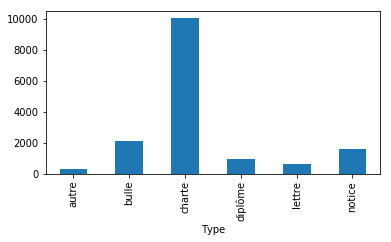

In [70]:
fig = plt.figure(figsize=(6,3))
cruzada2.groupby('Type').Texte.count().plot.bar(ylim=0)
plt.show()

In [71]:
cruzada.groupby(["Type", "category_id"]).size()

Type     category_id
autre    3                312
bulle    4               2108
charte   2              16541
diplôme  0                975
lettre   6                618
notice   1               1564
dtype: int64

In [72]:
cruzada2.groupby(["Type", "category_id"]).size()

Type     category_id
autre    3                312
bulle    4               2108
charte   2              10041
diplôme  0                975
lettre   6                618
notice   1               1564
dtype: int64

In [85]:
category_id_df = cruzada[['Type', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Type']].values)

In [74]:
#LIMITE PARA EL ENTRENAMIENTO

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', encoding='latin-1', ngram_range=(1, 3))
features = tfidf.fit_transform(cruzada.Texte).toarray()
labels = cruzada.category_id
features.shape

(16618, 31254)

In [90]:
#C=2.0, fit_intercept=False, verbose=1
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score


[LibLinear]

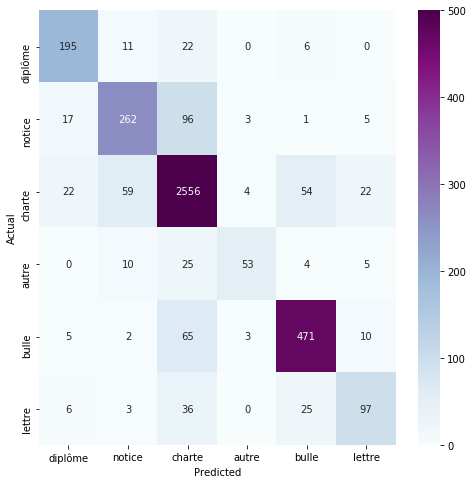

In [91]:
#class_weight="balanced"
model = LinearSVC(class_weight="balanced", C=2.0, fit_intercept=False, verbose=1)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, cruzada.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Type.values, yticklabels=category_id_df.Type.values, cmap="BuPu", vmax=500)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




In [60]:
#Modelo normal balanceado
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.82      0.78      0.80       247
      notice       0.75      0.66      0.71       378
      charte       0.94      0.96      0.95      4149
       autre       0.71      0.54      0.61        69
       bulle       0.81      0.87      0.84       524
      lettre       0.76      0.53      0.62       163

    accuracy                           0.90      5530
   macro avg       0.80      0.72      0.75      5530
weighted avg       0.90      0.90      0.90      5530



In [83]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.79      0.78      0.78       234
      notice       0.80      0.75      0.77       386
      charte       0.86      0.91      0.88      1138
       autre       0.81      0.75      0.78        69
       bulle       0.88      0.85      0.87       536
      lettre       0.73      0.67      0.70       167

    accuracy                           0.84      2530
   macro avg       0.81      0.78      0.80      2530
weighted avg       0.84      0.84      0.84      2530



In [109]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.83      0.83      0.83       233
      notice       0.71      0.71      0.71       382
      charte       0.91      0.93      0.92      2418
       autre       0.83      0.58      0.69        77
       bulle       0.86      0.84      0.85       522
      lettre       0.71      0.61      0.65       148

    accuracy                           0.87      3780
   macro avg       0.81      0.75      0.77      3780
weighted avg       0.87      0.87      0.87      3780



In [213]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.82      0.82      0.82       230
      notice       0.75      0.69      0.72       405
      charte       0.90      0.94      0.92      2620
       autre       0.82      0.60      0.69        92
       bulle       0.88      0.83      0.86       526
      lettre       0.70      0.59      0.64       157

    accuracy                           0.87      4030
   macro avg       0.81      0.75      0.78      4030
weighted avg       0.87      0.87      0.87      4030



In [201]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.85      0.83      0.84       277
      notice       0.72      0.66      0.69       382
      charte       0.91      0.93      0.92      2398
       autre       0.81      0.61      0.70        72
       bulle       0.86      0.87      0.86       509
      lettre       0.69      0.59      0.64       142

    accuracy                           0.87      3780
   macro avg       0.81      0.75      0.77      3780
weighted avg       0.87      0.87      0.87      3780



In [288]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.82      0.76      0.79       234
      notice       0.72      0.65      0.68       379
      charte       0.93      0.96      0.94      3940
       autre       0.88      0.56      0.69        80
       bulle       0.82      0.84      0.83       497
      lettre       0.64      0.56      0.60       150

    accuracy                           0.90      5280
   macro avg       0.80      0.72      0.75      5280
weighted avg       0.89      0.90      0.89      5280



In [282]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.80      0.80      0.80       236
      notice       0.79      0.71      0.75       405
      charte       0.92      0.94      0.93      2760
       autre       0.80      0.63      0.71        78
       bulle       0.85      0.86      0.86       530
      lettre       0.70      0.55      0.62       146

    accuracy                           0.88      4155
   macro avg       0.81      0.75      0.78      4155
weighted avg       0.88      0.88      0.88      4155



In [74]:
id_to_category

{0: 'diplôme', 1: 'notice', 2: 'charte', 3: 'autre', 4: 'bulle', 6: 'lettre'}

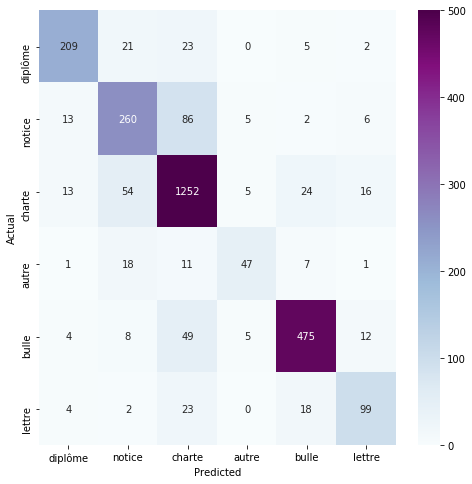

In [151]:
model = LinearSVC(C=1.0, fit_intercept=False, class_weight="balanced")
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, cruzada2.index, test_size=0.25, random_state=0)
#model.fit(X_train, y_train)

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Type.values, yticklabels=category_id_df.Type.values, cmap="BuPu", vmax=500)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [43]:
#RANDOM SAMPLER
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.79      0.74      0.77       246
      notice       0.72      0.68      0.70       358
      charte       0.92      0.94      0.93      2892
       autre       0.80      0.59      0.68        83
       bulle       0.82      0.85      0.84       550
      lettre       0.71      0.56      0.62       151

    accuracy                           0.87      4280
   macro avg       0.79      0.73      0.76      4280
weighted avg       0.87      0.87      0.87      4280



In [73]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.76      0.77      0.77       234
      notice       0.78      0.73      0.75       386
      charte       0.85      0.90      0.87      1138
       autre       0.81      0.70      0.75        69
       bulle       0.87      0.84      0.86       536
      lettre       0.70      0.65      0.68       167

    accuracy                           0.83      2530
   macro avg       0.80      0.77      0.78      2530
weighted avg       0.83      0.83      0.83      2530



In [281]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.80      0.80      0.80       236
      notice       0.79      0.71      0.75       405
      charte       0.92      0.94      0.93      2760
       autre       0.80      0.63      0.71        78
       bulle       0.85      0.86      0.86       530
      lettre       0.70      0.55      0.62       146

    accuracy                           0.88      4155
   macro avg       0.81      0.75      0.78      4155
weighted avg       0.88      0.88      0.88      4155



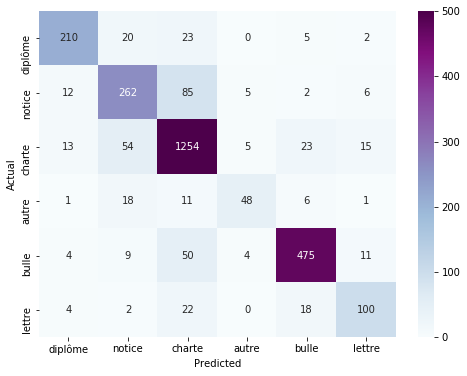

In [153]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, cruzada2.index, test_size=0.25, random_state=0)
#model.fit(X_train, y_train)

from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Type.values, yticklabels=category_id_df.Type.values, cmap="BuPu", vmax=500)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [47]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.81      0.76      0.78       246
      notice       0.73      0.67      0.70       358
      charte       0.91      0.94      0.93      2892
       autre       0.80      0.59      0.68        83
       bulle       0.83      0.85      0.84       550
      lettre       0.71      0.56      0.63       151

    accuracy                           0.87      4280
   macro avg       0.80      0.73      0.76      4280
weighted avg       0.87      0.87      0.87      4280



In [85]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.78      0.77      0.78       234
      notice       0.79      0.73      0.76       386
      charte       0.85      0.90      0.88      1138
       autre       0.84      0.71      0.77        69
       bulle       0.87      0.84      0.85       536
      lettre       0.70      0.66      0.68       167

    accuracy                           0.83      2530
   macro avg       0.81      0.77      0.79      2530
weighted avg       0.83      0.83      0.83      2530



In [273]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.82      0.83      0.82       246
      notice       0.75      0.71      0.73       383
      charte       0.92      0.94      0.93      2657
       autre       0.82      0.57      0.67        70
       bulle       0.88      0.83      0.85       535
      lettre       0.66      0.62      0.64       139

    accuracy                           0.88      4030
   macro avg       0.81      0.75      0.77      4030
weighted avg       0.88      0.88      0.88      4030



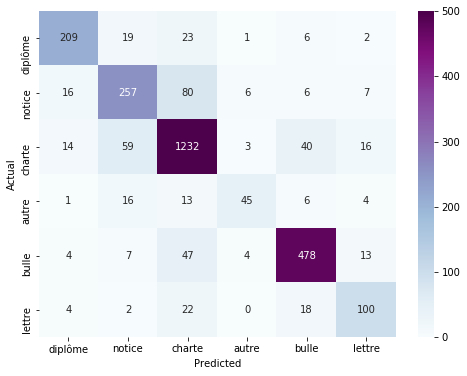

In [155]:
model = LinearSVC(C=1.0, fit_intercept=False)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, cruzada2.index, test_size=0.25, random_state=0)
#model.fit(X_train, y_train)

from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Type.values, yticklabels=category_id_df.Type.values, cmap="BuPu", vmax=500)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.76      0.76      0.76       192
      notice       0.77      0.77      0.77       308
      charte       0.91      0.91      0.91      1556
       autre       0.80      0.69      0.74        65
       bulle       0.83      0.90      0.86       400
      lettre       0.68      0.60      0.64       149

    accuracy                           0.86      2670
   macro avg       0.79      0.77      0.78      2670
weighted avg       0.86      0.86      0.86      2670



In [157]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.84      0.80      0.82       260
      notice       0.71      0.69      0.70       372
      charte       0.87      0.90      0.89      1364
       autre       0.76      0.53      0.62        85
       bulle       0.86      0.86      0.86       553
      lettre       0.70      0.68      0.69       146

    accuracy                           0.83      2780
   macro avg       0.79      0.75      0.77      2780
weighted avg       0.83      0.83      0.83      2780



In [58]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.76      0.79      0.78       243
      notice       0.75      0.71      0.73       396
      charte       0.91      0.94      0.93      2652
       autre       0.90      0.59      0.71        80
       bulle       0.85      0.83      0.84       509
      lettre       0.64      0.59      0.61       150

    accuracy                           0.87      4030
   macro avg       0.80      0.74      0.77      4030
weighted avg       0.87      0.87      0.87      4030



In [92]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=cruzada['Type'].unique()))

              precision    recall  f1-score   support

     diplôme       0.80      0.83      0.81       234
      notice       0.76      0.68      0.72       384
      charte       0.91      0.94      0.93      2717
       autre       0.84      0.55      0.66        97
       bulle       0.84      0.85      0.84       556
      lettre       0.70      0.58      0.63       167

    accuracy                           0.87      4155
   macro avg       0.81      0.74      0.77      4155
weighted avg       0.87      0.87      0.87      4155



In [26]:
#almacen5=[(nuevo2.loc[nuevo2["ID"]==k+".html"]["Type"].iloc[0], k," ".join(v)) for k,v in CDBE2.items()]


for k,v in CDBE2.items():
    print(nuevo2.loc[nuevo2["ID"]==k+".html"]["Type"].iloc[0], k, nuevo2.loc[nuevo2["ID"]==k+".html"]["ID"].iloc[0])

charte CDBE_1 CDBE_1.html
charte CDBE_10 CDBE_10.html
charte CDBE_100 CDBE_100.html
notice CDBE_1000 CDBE_1000.html
notice CDBE_1001 CDBE_1001.html
charte CDBE_10011 CDBE_10011.html
lettre CDBE_10019 CDBE_10019.html
notice CDBE_1002 CDBE_1002.html
lettre CDBE_10027 CDBE_10027.html
notice CDBE_1003 CDBE_1003.html
bulle CDBE_10030 CDBE_10030.html
charte CDBE_10039 CDBE_10039.html
notice CDBE_1004 CDBE_1004.html
bulle CDBE_10041 CDBE_10041.html
notice CDBE_1005 CDBE_1005.html
notice CDBE_1006 CDBE_1006.html
notice CDBE_1007 CDBE_1007.html
charte CDBE_10071 CDBE_10071.html
charte CDBE_10072 CDBE_10072.html
charte CDBE_10074 CDBE_10074.html
charte CDBE_10075 CDBE_10075.html
charte CDBE_10076 CDBE_10076.html
charte CDBE_10077 CDBE_10077.html
charte CDBE_10078 CDBE_10078.html
notice CDBE_1008 CDBE_1008.html
charte CDBE_10080 CDBE_10080.html
charte CDBE_10081 CDBE_10081.html
charte CDBE_10082 CDBE_10082.html
charte CDBE_10083 CDBE_10083.html
charte CDBE_10084 CDBE_10084.html
charte CDBE_10085 

notice CDBE_10404 CDBE_10404.html
charte CDBE_10405 CDBE_10405.html
charte CDBE_10406 CDBE_10406.html
notice CDBE_10407 CDBE_10407.html
charte CDBE_10408 CDBE_10408.html
charte CDBE_10409 CDBE_10409.html
autre CDBE_1041 CDBE_1041.html
charte CDBE_10410 CDBE_10410.html
charte CDBE_10411 CDBE_10411.html
charte CDBE_10412 CDBE_10412.html
charte CDBE_10413 CDBE_10413.html
notice CDBE_10414 CDBE_10414.html
notice CDBE_10415 CDBE_10415.html
notice CDBE_10416 CDBE_10416.html
notice CDBE_10417 CDBE_10417.html
charte CDBE_10418 CDBE_10418.html
charte CDBE_10419 CDBE_10419.html
charte CDBE_1042 CDBE_1042.html
charte CDBE_10420 CDBE_10420.html
charte CDBE_10421 CDBE_10421.html
charte CDBE_10422 CDBE_10422.html
charte CDBE_10423 CDBE_10423.html
charte CDBE_10424 CDBE_10424.html
charte CDBE_10425 CDBE_10425.html
charte CDBE_10426 CDBE_10426.html
charte CDBE_10427 CDBE_10427.html
charte CDBE_10428 CDBE_10428.html
charte CDBE_10429 CDBE_10429.html
charte CDBE_1043 CDBE_1043.html
charte CDBE_10430 CDB

charte CDBE_1274 CDBE_1274.html
diplôme CDBE_1275 CDBE_1275.html
diplôme CDBE_1276 CDBE_1276.html
charte CDBE_1277 CDBE_1277.html
diplôme CDBE_1278 CDBE_1278.html
charte CDBE_1279 CDBE_1279.html
charte CDBE_128 CDBE_128.html
diplôme CDBE_1280 CDBE_1280.html
notice CDBE_1281 CDBE_1281.html
charte CDBE_12815 CDBE_12815.html
notice CDBE_1282 CDBE_1282.html
notice CDBE_1283 CDBE_1283.html
charte CDBE_12832 CDBE_12832.html
charte CDBE_1284 CDBE_1284.html
diplôme CDBE_1285 CDBE_1285.html
charte CDBE_12858 CDBE_12858.html
notice CDBE_1286 CDBE_1286.html
notice CDBE_1287 CDBE_1287.html
notice CDBE_1288 CDBE_1288.html
charte CDBE_1289 CDBE_1289.html
notice CDBE_129 CDBE_129.html
notice CDBE_1290 CDBE_1290.html
charte CDBE_1291 CDBE_1291.html
notice CDBE_12913 CDBE_12913.html
charte CDBE_1292 CDBE_1292.html
charte CDBE_1293 CDBE_1293.html
charte CDBE_1294 CDBE_1294.html
charte CDBE_12947 CDBE_12947.html
notice CDBE_1295 CDBE_1295.html
notice CDBE_1296 CDBE_1296.html
charte CDBE_12966 CDBE_12966.

charte CDBE_13385 CDBE_13385.html
charte CDBE_13388 CDBE_13388.html
charte CDBE_13389 CDBE_13389.html
charte CDBE_1339 CDBE_1339.html
charte CDBE_13392 CDBE_13392.html
charte CDBE_13393 CDBE_13393.html
lettre CDBE_13396 CDBE_13396.html
charte CDBE_13397 CDBE_13397.html
bulle CDBE_13398 CDBE_13398.html
charte CDBE_134 CDBE_134.html
bulle CDBE_1340 CDBE_1340.html
charte CDBE_13401 CDBE_13401.html
charte CDBE_13403 CDBE_13403.html
charte CDBE_13404 CDBE_13404.html
charte CDBE_13405 CDBE_13405.html
charte CDBE_13406 CDBE_13406.html
charte CDBE_13407 CDBE_13407.html
charte CDBE_13409 CDBE_13409.html
charte CDBE_1341 CDBE_1341.html
charte CDBE_13410 CDBE_13410.html
lettre CDBE_13411 CDBE_13411.html
lettre CDBE_13412 CDBE_13412.html
charte CDBE_1342 CDBE_1342.html
charte CDBE_13421 CDBE_13421.html
diplôme CDBE_13422 CDBE_13422.html
bulle CDBE_13424 CDBE_13424.html
bulle CDBE_13425 CDBE_13425.html
charte CDBE_13426 CDBE_13426.html
charte CDBE_13427 CDBE_13427.html
bulle CDBE_13428 CDBE_13428.h

bulle CDBE_14131 CDBE_14131.html
diplôme CDBE_14133 CDBE_14133.html
diplôme CDBE_14134 CDBE_14134.html
charte CDBE_14136 CDBE_14136.html
bulle CDBE_1414 CDBE_1414.html
charte CDBE_14142 CDBE_14142.html
charte CDBE_14143 CDBE_14143.html
bulle CDBE_14146 CDBE_14146.html
charte CDBE_14147 CDBE_14147.html
charte CDBE_14149 CDBE_14149.html
charte CDBE_1415 CDBE_1415.html
charte CDBE_14150 CDBE_14150.html
diplôme CDBE_14155 CDBE_14155.html
charte CDBE_14157 CDBE_14157.html
charte CDBE_14159 CDBE_14159.html
autre CDBE_1416 CDBE_1416.html
bulle CDBE_14160 CDBE_14160.html
charte CDBE_14161 CDBE_14161.html
charte CDBE_14164 CDBE_14164.html
diplôme CDBE_14166 CDBE_14166.html
charte CDBE_14167 CDBE_14167.html
diplôme CDBE_14169 CDBE_14169.html
bulle CDBE_1417 CDBE_1417.html
diplôme CDBE_14173 CDBE_14173.html
charte CDBE_14174 CDBE_14174.html
diplôme CDBE_14175 CDBE_14175.html
charte CDBE_14178 CDBE_14178.html
charte CDBE_14179 CDBE_14179.html
charte CDBE_1418 CDBE_1418.html
charte CDBE_14180 CDBE_

charte CDBE_14823 CDBE_14823.html
charte CDBE_14824 CDBE_14824.html
charte CDBE_14826 CDBE_14826.html
bulle CDBE_14827 CDBE_14827.html
charte CDBE_14829 CDBE_14829.html
diplôme CDBE_1483 CDBE_1483.html
charte CDBE_14830 CDBE_14830.html
charte CDBE_14832 CDBE_14832.html
bulle CDBE_14833 CDBE_14833.html
charte CDBE_14834 CDBE_14834.html
charte CDBE_14835 CDBE_14835.html
charte CDBE_14836 CDBE_14836.html
charte CDBE_14837 CDBE_14837.html
charte CDBE_14838 CDBE_14838.html
charte CDBE_14839 CDBE_14839.html
diplôme CDBE_1484 CDBE_1484.html
charte CDBE_14840 CDBE_14840.html
charte CDBE_14841 CDBE_14841.html
notice CDBE_14842 CDBE_14842.html
charte CDBE_14843 CDBE_14843.html
charte CDBE_14844 CDBE_14844.html
charte CDBE_14846 CDBE_14846.html
charte CDBE_14847 CDBE_14847.html
charte CDBE_14848 CDBE_14848.html
charte CDBE_1485 CDBE_1485.html
charte CDBE_14850 CDBE_14850.html
charte CDBE_14851 CDBE_14851.html
charte CDBE_14852 CDBE_14852.html
charte CDBE_14853 CDBE_14853.html
charte CDBE_14854 CD

charte CDBE_15171 CDBE_15171.html
charte CDBE_15172 CDBE_15172.html
charte CDBE_15173 CDBE_15173.html
notice CDBE_15174 CDBE_15174.html
notice CDBE_15175 CDBE_15175.html
charte CDBE_15176 CDBE_15176.html
diplôme CDBE_15177 CDBE_15177.html
diplôme CDBE_15178 CDBE_15178.html
autre CDBE_15179 CDBE_15179.html
bulle CDBE_1518 CDBE_1518.html
charte CDBE_15180 CDBE_15180.html
charte CDBE_15182 CDBE_15182.html
diplôme CDBE_15183 CDBE_15183.html
charte CDBE_15184 CDBE_15184.html
charte CDBE_15185 CDBE_15185.html
charte CDBE_15187 CDBE_15187.html
bulle CDBE_1519 CDBE_1519.html
diplôme CDBE_15191 CDBE_15191.html
charte CDBE_15192 CDBE_15192.html
charte CDBE_15193 CDBE_15193.html
diplôme CDBE_15194 CDBE_15194.html
diplôme CDBE_15195 CDBE_15195.html
charte CDBE_15196 CDBE_15196.html
diplôme CDBE_15198 CDBE_15198.html
diplôme CDBE_15199 CDBE_15199.html
charte CDBE_152 CDBE_152.html
bulle CDBE_1520 CDBE_1520.html
diplôme CDBE_15201 CDBE_15201.html
charte CDBE_15202 CDBE_15202.html
charte CDBE_15203 C

charte CDBE_15822 CDBE_15822.html
charte CDBE_15824 CDBE_15824.html
charte CDBE_15827 CDBE_15827.html
charte CDBE_15828 CDBE_15828.html
charte CDBE_1583 CDBE_1583.html
charte CDBE_15831 CDBE_15831.html
charte CDBE_15832 CDBE_15832.html
charte CDBE_15833 CDBE_15833.html
charte CDBE_15834 CDBE_15834.html
charte CDBE_1584 CDBE_1584.html
charte CDBE_15840 CDBE_15840.html
charte CDBE_15842 CDBE_15842.html
charte CDBE_15844 CDBE_15844.html
charte CDBE_15845 CDBE_15845.html
charte CDBE_15846 CDBE_15846.html
charte CDBE_15847 CDBE_15847.html
charte CDBE_15849 CDBE_15849.html
charte CDBE_1585 CDBE_1585.html
charte CDBE_15850 CDBE_15850.html
charte CDBE_15851 CDBE_15851.html
charte CDBE_15852 CDBE_15852.html
charte CDBE_15854 CDBE_15854.html
charte CDBE_15855 CDBE_15855.html
charte CDBE_15856 CDBE_15856.html
charte CDBE_15857 CDBE_15857.html
charte CDBE_15858 CDBE_15858.html
charte CDBE_15859 CDBE_15859.html
charte CDBE_1586 CDBE_1586.html
charte CDBE_15860 CDBE_15860.html
charte CDBE_15861 CDBE

charte CDBE_162 CDBE_162.html
lettre CDBE_1620 CDBE_1620.html
charte CDBE_16200 CDBE_16200.html
bulle CDBE_16203 CDBE_16203.html
charte CDBE_16204 CDBE_16204.html
charte CDBE_16205 CDBE_16205.html
charte CDBE_16206 CDBE_16206.html
charte CDBE_16208 CDBE_16208.html
charte CDBE_16209 CDBE_16209.html
lettre CDBE_1621 CDBE_1621.html
diplôme CDBE_16211 CDBE_16211.html
charte CDBE_16212 CDBE_16212.html
charte CDBE_16213 CDBE_16213.html
charte CDBE_16215 CDBE_16215.html
charte CDBE_16216 CDBE_16216.html
charte CDBE_16217 CDBE_16217.html
charte CDBE_16218 CDBE_16218.html
charte CDBE_16219 CDBE_16219.html
lettre CDBE_1622 CDBE_1622.html
charte CDBE_16222 CDBE_16222.html
bulle CDBE_16223 CDBE_16223.html
charte CDBE_16225 CDBE_16225.html
charte CDBE_16226 CDBE_16226.html
charte CDBE_16227 CDBE_16227.html
charte CDBE_1623 CDBE_1623.html
charte CDBE_16230 CDBE_16230.html
charte CDBE_16231 CDBE_16231.html
charte CDBE_16232 CDBE_16232.html
charte CDBE_16233 CDBE_16233.html
charte CDBE_16234 CDBE_1623

diplôme CDBE_1690 CDBE_1690.html
charte CDBE_16900 CDBE_16900.html
charte CDBE_16902 CDBE_16902.html
charte CDBE_16903 CDBE_16903.html
charte CDBE_16904 CDBE_16904.html
charte CDBE_16905 CDBE_16905.html
charte CDBE_16907 CDBE_16907.html
charte CDBE_16909 CDBE_16909.html
bulle CDBE_1691 CDBE_1691.html
charte CDBE_16910 CDBE_16910.html
charte CDBE_16911 CDBE_16911.html
charte CDBE_16912 CDBE_16912.html
lettre CDBE_16914 CDBE_16914.html
charte CDBE_16915 CDBE_16915.html
charte CDBE_16916 CDBE_16916.html
charte CDBE_16917 CDBE_16917.html
charte CDBE_16918 CDBE_16918.html
charte CDBE_16919 CDBE_16919.html
charte CDBE_1692 CDBE_1692.html
charte CDBE_16920 CDBE_16920.html
diplôme CDBE_16921 CDBE_16921.html
charte CDBE_16922 CDBE_16922.html
charte CDBE_16923 CDBE_16923.html
charte CDBE_16924 CDBE_16924.html
charte CDBE_16925 CDBE_16925.html
charte CDBE_16926 CDBE_16926.html
charte CDBE_16927 CDBE_16927.html
lettre CDBE_1693 CDBE_1693.html
charte CDBE_16931 CDBE_16931.html
charte CDBE_16932 CDB

charte CDBE_17558 CDBE_17558.html
charte CDBE_1756 CDBE_1756.html
charte CDBE_17560 CDBE_17560.html
charte CDBE_17561 CDBE_17561.html
bulle CDBE_17563 CDBE_17563.html
bulle CDBE_17564 CDBE_17564.html
bulle CDBE_17565 CDBE_17565.html
charte CDBE_17567 CDBE_17567.html
charte CDBE_17568 CDBE_17568.html
charte CDBE_17569 CDBE_17569.html
charte CDBE_1757 CDBE_1757.html
bulle CDBE_17571 CDBE_17571.html
charte CDBE_17572 CDBE_17572.html
charte CDBE_17573 CDBE_17573.html
bulle CDBE_17574 CDBE_17574.html
charte CDBE_17575 CDBE_17575.html
charte CDBE_17578 CDBE_17578.html
charte CDBE_17579 CDBE_17579.html
charte CDBE_1758 CDBE_1758.html
charte CDBE_17580 CDBE_17580.html
charte CDBE_17582 CDBE_17582.html
charte CDBE_17583 CDBE_17583.html
charte CDBE_17587 CDBE_17587.html
charte CDBE_17588 CDBE_17588.html
charte CDBE_17589 CDBE_17589.html
charte CDBE_1759 CDBE_1759.html
charte CDBE_17591 CDBE_17591.html
charte CDBE_17592 CDBE_17592.html
charte CDBE_17594 CDBE_17594.html
charte CDBE_17595 CDBE_1759

charte CDBE_18034 CDBE_18034.html
charte CDBE_18035 CDBE_18035.html
charte CDBE_18037 CDBE_18037.html
charte CDBE_1804 CDBE_1804.html
charte CDBE_18040 CDBE_18040.html
charte CDBE_18041 CDBE_18041.html
charte CDBE_18043 CDBE_18043.html
charte CDBE_18044 CDBE_18044.html
charte CDBE_18045 CDBE_18045.html
charte CDBE_18047 CDBE_18047.html
charte CDBE_18048 CDBE_18048.html
charte CDBE_18049 CDBE_18049.html
charte CDBE_18050 CDBE_18050.html
charte CDBE_18051 CDBE_18051.html
charte CDBE_18052 CDBE_18052.html
charte CDBE_18053 CDBE_18053.html
charte CDBE_18054 CDBE_18054.html
charte CDBE_18056 CDBE_18056.html
charte CDBE_18057 CDBE_18057.html
charte CDBE_18058 CDBE_18058.html
charte CDBE_18059 CDBE_18059.html
charte CDBE_18060 CDBE_18060.html
charte CDBE_18061 CDBE_18061.html
charte CDBE_18062 CDBE_18062.html
bulle CDBE_18063 CDBE_18063.html
charte CDBE_18064 CDBE_18064.html
charte CDBE_18065 CDBE_18065.html
charte CDBE_18068 CDBE_18068.html
charte CDBE_18070 CDBE_18070.html
charte CDBE_18071

charte CDBE_1869 CDBE_1869.html
charte CDBE_18690 CDBE_18690.html
bulle CDBE_18691 CDBE_18691.html
charte CDBE_18692 CDBE_18692.html
bulle CDBE_18693 CDBE_18693.html
charte CDBE_18694 CDBE_18694.html
bulle CDBE_18695 CDBE_18695.html
bulle CDBE_18696 CDBE_18696.html
charte CDBE_18697 CDBE_18697.html
bulle CDBE_18698 CDBE_18698.html
charte CDBE_18699 CDBE_18699.html
charte CDBE_187 CDBE_187.html
charte CDBE_1870 CDBE_1870.html
charte CDBE_18700 CDBE_18700.html
charte CDBE_18701 CDBE_18701.html
diplôme CDBE_18703 CDBE_18703.html
charte CDBE_18704 CDBE_18704.html
charte CDBE_18706 CDBE_18706.html
charte CDBE_18707 CDBE_18707.html
charte CDBE_18708 CDBE_18708.html
charte CDBE_18709 CDBE_18709.html
charte CDBE_1871 CDBE_1871.html
notice CDBE_18710 CDBE_18710.html
charte CDBE_18711 CDBE_18711.html
charte CDBE_18714 CDBE_18714.html
diplôme CDBE_18715 CDBE_18715.html
charte CDBE_18716 CDBE_18716.html
charte CDBE_1872 CDBE_1872.html
charte CDBE_18720 CDBE_18720.html
charte CDBE_18721 CDBE_18721.

charte CDBE_19319 CDBE_19319.html
charte CDBE_19320 CDBE_19320.html
charte CDBE_19322 CDBE_19322.html
charte CDBE_19324 CDBE_19324.html
charte CDBE_19325 CDBE_19325.html
charte CDBE_19326 CDBE_19326.html
charte CDBE_19329 CDBE_19329.html
charte CDBE_1933 CDBE_1933.html
charte CDBE_19331 CDBE_19331.html
bulle CDBE_19333 CDBE_19333.html
notice CDBE_19334 CDBE_19334.html
charte CDBE_19337 CDBE_19337.html
charte CDBE_19338 CDBE_19338.html
charte CDBE_19339 CDBE_19339.html
notice CDBE_1934 CDBE_1934.html
charte CDBE_19343 CDBE_19343.html
charte CDBE_19344 CDBE_19344.html
charte CDBE_19345 CDBE_19345.html
charte CDBE_19346 CDBE_19346.html
charte CDBE_19347 CDBE_19347.html
charte CDBE_19348 CDBE_19348.html
charte CDBE_19349 CDBE_19349.html
notice CDBE_1935 CDBE_1935.html
charte CDBE_19350 CDBE_19350.html
charte CDBE_19351 CDBE_19351.html
charte CDBE_19352 CDBE_19352.html
charte CDBE_19353 CDBE_19353.html
charte CDBE_19360 CDBE_19360.html
charte CDBE_19361 CDBE_19361.html
charte CDBE_19362 CDB

charte CDBE_19730 CDBE_19730.html
bulle CDBE_19732 CDBE_19732.html
charte CDBE_19733 CDBE_19733.html
charte CDBE_19734 CDBE_19734.html
charte CDBE_19735 CDBE_19735.html
diplôme CDBE_19736 CDBE_19736.html
charte CDBE_19737 CDBE_19737.html
bulle CDBE_19738 CDBE_19738.html
bulle CDBE_19739 CDBE_19739.html
charte CDBE_19740 CDBE_19740.html
charte CDBE_19741 CDBE_19741.html
charte CDBE_19742 CDBE_19742.html
charte CDBE_19743 CDBE_19743.html
charte CDBE_19744 CDBE_19744.html
charte CDBE_19745 CDBE_19745.html
charte CDBE_19746 CDBE_19746.html
charte CDBE_19747 CDBE_19747.html
charte CDBE_19748 CDBE_19748.html
charte CDBE_19749 CDBE_19749.html
charte CDBE_1975 CDBE_1975.html
charte CDBE_19750 CDBE_19750.html
charte CDBE_19751 CDBE_19751.html
charte CDBE_19755 CDBE_19755.html
charte CDBE_19757 CDBE_19757.html
autre CDBE_19758 CDBE_19758.html
charte CDBE_19759 CDBE_19759.html
charte CDBE_1976 CDBE_1976.html
charte CDBE_19760 CDBE_19760.html
charte CDBE_19761 CDBE_19761.html
charte CDBE_19762 CDB

charte CDBE_20342 CDBE_20342.html
charte CDBE_20343 CDBE_20343.html
bulle CDBE_20344 CDBE_20344.html
charte CDBE_20345 CDBE_20345.html
bulle CDBE_20346 CDBE_20346.html
bulle CDBE_20347 CDBE_20347.html
charte CDBE_20348 CDBE_20348.html
charte CDBE_20349 CDBE_20349.html
charte CDBE_2035 CDBE_2035.html
charte CDBE_20350 CDBE_20350.html
charte CDBE_20354 CDBE_20354.html
charte CDBE_20355 CDBE_20355.html
charte CDBE_20356 CDBE_20356.html
charte CDBE_20357 CDBE_20357.html
charte CDBE_20358 CDBE_20358.html
charte CDBE_20359 CDBE_20359.html
charte CDBE_2036 CDBE_2036.html
charte CDBE_20360 CDBE_20360.html
charte CDBE_20361 CDBE_20361.html
charte CDBE_20362 CDBE_20362.html
charte CDBE_20363 CDBE_20363.html
charte CDBE_20364 CDBE_20364.html
charte CDBE_20365 CDBE_20365.html
charte CDBE_20366 CDBE_20366.html
charte CDBE_20367 CDBE_20367.html
charte CDBE_20368 CDBE_20368.html
charte CDBE_20369 CDBE_20369.html
charte CDBE_20371 CDBE_20371.html
autre CDBE_20372 CDBE_20372.html
charte CDBE_20376 CDBE

charte CDBE_21115 CDBE_21115.html
charte CDBE_21118 CDBE_21118.html
notice CDBE_2112 CDBE_2112.html
charte CDBE_21123 CDBE_21123.html
charte CDBE_21124 CDBE_21124.html
bulle CDBE_21125 CDBE_21125.html
charte CDBE_21126 CDBE_21126.html
bulle CDBE_21127 CDBE_21127.html
charte CDBE_2113 CDBE_2113.html
charte CDBE_21130 CDBE_21130.html
charte CDBE_21134 CDBE_21134.html
charte CDBE_21137 CDBE_21137.html
bulle CDBE_21138 CDBE_21138.html
charte CDBE_21139 CDBE_21139.html
charte CDBE_2114 CDBE_2114.html
charte CDBE_21140 CDBE_21140.html
charte CDBE_21141 CDBE_21141.html
charte CDBE_21142 CDBE_21142.html
bulle CDBE_21145 CDBE_21145.html
charte CDBE_21147 CDBE_21147.html
charte CDBE_21148 CDBE_21148.html
charte CDBE_21149 CDBE_21149.html
bulle CDBE_21150 CDBE_21150.html
charte CDBE_21151 CDBE_21151.html
charte CDBE_21152 CDBE_21152.html
lettre CDBE_21153 CDBE_21153.html
charte CDBE_21155 CDBE_21155.html
charte CDBE_21156 CDBE_21156.html
charte CDBE_21159 CDBE_21159.html
charte CDBE_2116 CDBE_211

charte CDBE_21513 CDBE_21513.html
charte CDBE_21514 CDBE_21514.html
charte CDBE_21515 CDBE_21515.html
charte CDBE_21518 CDBE_21518.html
charte CDBE_2152 CDBE_2152.html
charte CDBE_21520 CDBE_21520.html
charte CDBE_21521 CDBE_21521.html
charte CDBE_21522 CDBE_21522.html
charte CDBE_21524 CDBE_21524.html
charte CDBE_21525 CDBE_21525.html
charte CDBE_21526 CDBE_21526.html
charte CDBE_21527 CDBE_21527.html
charte CDBE_21529 CDBE_21529.html
charte CDBE_2153 CDBE_2153.html
charte CDBE_21530 CDBE_21530.html
charte CDBE_21533 CDBE_21533.html
charte CDBE_21534 CDBE_21534.html
charte CDBE_21535 CDBE_21535.html
charte CDBE_21537 CDBE_21537.html
charte CDBE_21540 CDBE_21540.html
autre CDBE_21545 CDBE_21545.html
notice CDBE_21546 CDBE_21546.html
notice CDBE_21550 CDBE_21550.html
charte CDBE_21551 CDBE_21551.html
charte CDBE_21552 CDBE_21552.html
charte CDBE_21554 CDBE_21554.html
charte CDBE_21555 CDBE_21555.html
charte CDBE_21556 CDBE_21556.html
charte CDBE_21557 CDBE_21557.html
charte CDBE_21558 C

charte CDBE_22166 CDBE_22166.html
charte CDBE_22167 CDBE_22167.html
charte CDBE_22168 CDBE_22168.html
charte CDBE_22169 CDBE_22169.html
charte CDBE_2217 CDBE_2217.html
charte CDBE_22170 CDBE_22170.html
notice CDBE_22174 CDBE_22174.html
charte CDBE_22175 CDBE_22175.html
charte CDBE_22177 CDBE_22177.html
charte CDBE_22179 CDBE_22179.html
charte CDBE_2218 CDBE_2218.html
charte CDBE_22180 CDBE_22180.html
charte CDBE_22181 CDBE_22181.html
charte CDBE_22182 CDBE_22182.html
charte CDBE_22183 CDBE_22183.html
charte CDBE_22184 CDBE_22184.html
charte CDBE_22185 CDBE_22185.html
charte CDBE_22186 CDBE_22186.html
bulle CDBE_22188 CDBE_22188.html
charte CDBE_22190 CDBE_22190.html
charte CDBE_22191 CDBE_22191.html
charte CDBE_22194 CDBE_22194.html
charte CDBE_22195 CDBE_22195.html
charte CDBE_22196 CDBE_22196.html
charte CDBE_22197 CDBE_22197.html
charte CDBE_22198 CDBE_22198.html
charte CDBE_22199 CDBE_22199.html
charte CDBE_222 CDBE_222.html
charte CDBE_2220 CDBE_2220.html
charte CDBE_22200 CDBE_22

charte CDBE_2290 CDBE_2290.html
bulle CDBE_22900 CDBE_22900.html
charte CDBE_22901 CDBE_22901.html
bulle CDBE_22902 CDBE_22902.html
bulle CDBE_22903 CDBE_22903.html
bulle CDBE_22904 CDBE_22904.html
bulle CDBE_22905 CDBE_22905.html
charte CDBE_22907 CDBE_22907.html
charte CDBE_22908 CDBE_22908.html
charte CDBE_22909 CDBE_22909.html
charte CDBE_2291 CDBE_2291.html
charte CDBE_22910 CDBE_22910.html
charte CDBE_22911 CDBE_22911.html
charte CDBE_22913 CDBE_22913.html
charte CDBE_22914 CDBE_22914.html
charte CDBE_22916 CDBE_22916.html
charte CDBE_22918 CDBE_22918.html
charte CDBE_22919 CDBE_22919.html
charte CDBE_22921 CDBE_22921.html
bulle CDBE_22922 CDBE_22922.html
bulle CDBE_22923 CDBE_22923.html
bulle CDBE_22926 CDBE_22926.html
charte CDBE_22931 CDBE_22931.html
charte CDBE_22934 CDBE_22934.html
charte CDBE_22935 CDBE_22935.html
charte CDBE_22936 CDBE_22936.html
charte CDBE_22937 CDBE_22937.html
charte CDBE_22938 CDBE_22938.html
charte CDBE_22939 CDBE_22939.html
bulle CDBE_2294 CDBE_2294.

charte CDBE_23350 CDBE_23350.html
bulle CDBE_23353 CDBE_23353.html
charte CDBE_23354 CDBE_23354.html
diplôme CDBE_23355 CDBE_23355.html
charte CDBE_23356 CDBE_23356.html
charte CDBE_23357 CDBE_23357.html
charte CDBE_23358 CDBE_23358.html
charte CDBE_23359 CDBE_23359.html
charte CDBE_23360 CDBE_23360.html
charte CDBE_23361 CDBE_23361.html
charte CDBE_23363 CDBE_23363.html
charte CDBE_23369 CDBE_23369.html
charte CDBE_2337 CDBE_2337.html
charte CDBE_23372 CDBE_23372.html
charte CDBE_23373 CDBE_23373.html
bulle CDBE_23374 CDBE_23374.html
charte CDBE_23376 CDBE_23376.html
bulle CDBE_23377 CDBE_23377.html
charte CDBE_2338 CDBE_2338.html
charte CDBE_23386 CDBE_23386.html
bulle CDBE_23387 CDBE_23387.html
charte CDBE_23389 CDBE_23389.html
charte CDBE_2339 CDBE_2339.html
charte CDBE_23390 CDBE_23390.html
charte CDBE_23393 CDBE_23393.html
charte CDBE_23394 CDBE_23394.html
charte CDBE_23396 CDBE_23396.html
charte CDBE_23397 CDBE_23397.html
charte CDBE_23398 CDBE_23398.html
charte CDBE_2340 CDBE_2

bulle CDBE_24136 CDBE_24136.html
charte CDBE_24137 CDBE_24137.html
charte CDBE_24138 CDBE_24138.html
bulle CDBE_2414 CDBE_2414.html
charte CDBE_24142 CDBE_24142.html
charte CDBE_24143 CDBE_24143.html
bulle CDBE_24145 CDBE_24145.html
bulle CDBE_24146 CDBE_24146.html
bulle CDBE_24147 CDBE_24147.html
bulle CDBE_24148 CDBE_24148.html
bulle CDBE_24149 CDBE_24149.html
bulle CDBE_2415 CDBE_2415.html
charte CDBE_24150 CDBE_24150.html
bulle CDBE_24151 CDBE_24151.html
bulle CDBE_24152 CDBE_24152.html
charte CDBE_24159 CDBE_24159.html
bulle CDBE_2416 CDBE_2416.html
charte CDBE_24161 CDBE_24161.html
bulle CDBE_24162 CDBE_24162.html
charte CDBE_24163 CDBE_24163.html
bulle CDBE_24164 CDBE_24164.html
charte CDBE_24165 CDBE_24165.html
charte CDBE_24166 CDBE_24166.html
bulle CDBE_24168 CDBE_24168.html
bulle CDBE_24169 CDBE_24169.html
bulle CDBE_2417 CDBE_2417.html
bulle CDBE_24170 CDBE_24170.html
charte CDBE_24171 CDBE_24171.html
charte CDBE_24172 CDBE_24172.html
bulle CDBE_24173 CDBE_24173.html
bulle 

charte CDBE_2454 CDBE_2454.html
charte CDBE_24540 CDBE_24540.html
charte CDBE_24543 CDBE_24543.html
charte CDBE_24544 CDBE_24544.html
charte CDBE_24545 CDBE_24545.html
charte CDBE_24546 CDBE_24546.html
charte CDBE_24547 CDBE_24547.html
charte CDBE_24548 CDBE_24548.html
charte CDBE_24549 CDBE_24549.html
charte CDBE_2455 CDBE_2455.html
charte CDBE_24550 CDBE_24550.html
charte CDBE_24551 CDBE_24551.html
charte CDBE_24552 CDBE_24552.html
charte CDBE_24553 CDBE_24553.html
charte CDBE_24556 CDBE_24556.html
charte CDBE_24557 CDBE_24557.html
charte CDBE_24558 CDBE_24558.html
charte CDBE_24559 CDBE_24559.html
charte CDBE_2456 CDBE_2456.html
bulle CDBE_24560 CDBE_24560.html
charte CDBE_24562 CDBE_24562.html
charte CDBE_24563 CDBE_24563.html
charte CDBE_24564 CDBE_24564.html
charte CDBE_24565 CDBE_24565.html
charte CDBE_24566 CDBE_24566.html
charte CDBE_24567 CDBE_24567.html
charte CDBE_24568 CDBE_24568.html
charte CDBE_24569 CDBE_24569.html
bulle CDBE_2457 CDBE_2457.html
charte CDBE_24570 CDBE_2

charte CDBE_25610 CDBE_25610.html
charte CDBE_25620 CDBE_25620.html
charte CDBE_25630 CDBE_25630.html
charte CDBE_25640 CDBE_25640.html
charte CDBE_25641 CDBE_25641.html
charte CDBE_25643 CDBE_25643.html
charte CDBE_25649 CDBE_25649.html
charte CDBE_25660 CDBE_25660.html
charte CDBE_25668 CDBE_25668.html
charte CDBE_25669 CDBE_25669.html
charte CDBE_25670 CDBE_25670.html
charte CDBE_25671 CDBE_25671.html
charte CDBE_25675 CDBE_25675.html
charte CDBE_25678 CDBE_25678.html
bulle CDBE_25679 CDBE_25679.html
charte CDBE_25680 CDBE_25680.html
charte CDBE_25682 CDBE_25682.html
charte CDBE_25683 CDBE_25683.html
charte CDBE_25685 CDBE_25685.html
charte CDBE_25688 CDBE_25688.html
charte CDBE_25689 CDBE_25689.html
charte CDBE_2569 CDBE_2569.html
charte CDBE_25690 CDBE_25690.html
bulle CDBE_25699 CDBE_25699.html
notice CDBE_2570 CDBE_2570.html
charte CDBE_25700 CDBE_25700.html
charte CDBE_25701 CDBE_25701.html
charte CDBE_25702 CDBE_25702.html
charte CDBE_25703 CDBE_25703.html
charte CDBE_25705 CD

bulle CDBE_2663 CDBE_2663.html
charte CDBE_26630 CDBE_26630.html
charte CDBE_26631 CDBE_26631.html
charte CDBE_26632 CDBE_26632.html
charte CDBE_26633 CDBE_26633.html
charte CDBE_26634 CDBE_26634.html
charte CDBE_26635 CDBE_26635.html
charte CDBE_26636 CDBE_26636.html
charte CDBE_26637 CDBE_26637.html
bulle CDBE_26638 CDBE_26638.html
charte CDBE_26639 CDBE_26639.html
bulle CDBE_2664 CDBE_2664.html
charte CDBE_26640 CDBE_26640.html
bulle CDBE_26641 CDBE_26641.html
charte CDBE_26644 CDBE_26644.html
charte CDBE_26645 CDBE_26645.html
bulle CDBE_26646 CDBE_26646.html
charte CDBE_26647 CDBE_26647.html
charte CDBE_26648 CDBE_26648.html
charte CDBE_26649 CDBE_26649.html
bulle CDBE_2665 CDBE_2665.html
charte CDBE_26650 CDBE_26650.html
charte CDBE_26651 CDBE_26651.html
charte CDBE_26652 CDBE_26652.html
charte CDBE_26653 CDBE_26653.html
charte CDBE_26654 CDBE_26654.html
charte CDBE_26655 CDBE_26655.html
charte CDBE_26656 CDBE_26656.html
notice CDBE_26657 CDBE_26657.html
charte CDBE_26658 CDBE_266

charte CDBE_26976 CDBE_26976.html
charte CDBE_26977 CDBE_26977.html
charte CDBE_26978 CDBE_26978.html
charte CDBE_26979 CDBE_26979.html
charte CDBE_2698 CDBE_2698.html
charte CDBE_26980 CDBE_26980.html
charte CDBE_26981 CDBE_26981.html
charte CDBE_26982 CDBE_26982.html
charte CDBE_26983 CDBE_26983.html
charte CDBE_26984 CDBE_26984.html
charte CDBE_26985 CDBE_26985.html
charte CDBE_26986 CDBE_26986.html
charte CDBE_26987 CDBE_26987.html
charte CDBE_26988 CDBE_26988.html
charte CDBE_26989 CDBE_26989.html
charte CDBE_2699 CDBE_2699.html
charte CDBE_26990 CDBE_26990.html
charte CDBE_26991 CDBE_26991.html
charte CDBE_26992 CDBE_26992.html
charte CDBE_26993 CDBE_26993.html
charte CDBE_26994 CDBE_26994.html
charte CDBE_26995 CDBE_26995.html
charte CDBE_26996 CDBE_26996.html
charte CDBE_26997 CDBE_26997.html
charte CDBE_26998 CDBE_26998.html
charte CDBE_26999 CDBE_26999.html
charte CDBE_27 CDBE_27.html
charte CDBE_270 CDBE_270.html
charte CDBE_2700 CDBE_2700.html
charte CDBE_27000 CDBE_27000.h

charte CDBE_27566 CDBE_27566.html
charte CDBE_27567 CDBE_27567.html
charte CDBE_27568 CDBE_27568.html
charte CDBE_27569 CDBE_27569.html
charte CDBE_2757 CDBE_2757.html
charte CDBE_27572 CDBE_27572.html
charte CDBE_27573 CDBE_27573.html
charte CDBE_27574 CDBE_27574.html
charte CDBE_27575 CDBE_27575.html
charte CDBE_27576 CDBE_27576.html
charte CDBE_27577 CDBE_27577.html
charte CDBE_27578 CDBE_27578.html
charte CDBE_27579 CDBE_27579.html
diplôme CDBE_2758 CDBE_2758.html
charte CDBE_27580 CDBE_27580.html
charte CDBE_27581 CDBE_27581.html
charte CDBE_27584 CDBE_27584.html
charte CDBE_27585 CDBE_27585.html
charte CDBE_27586 CDBE_27586.html
charte CDBE_27589 CDBE_27589.html
diplôme CDBE_2759 CDBE_2759.html
charte CDBE_27590 CDBE_27590.html
charte CDBE_27591 CDBE_27591.html
charte CDBE_27592 CDBE_27592.html
charte CDBE_27593 CDBE_27593.html
charte CDBE_27594 CDBE_27594.html
charte CDBE_27595 CDBE_27595.html
charte CDBE_27596 CDBE_27596.html
charte CDBE_27597 CDBE_27597.html
charte CDBE_27598 

charte CDBE_2801 CDBE_2801.html
charte CDBE_28010 CDBE_28010.html
charte CDBE_28011 CDBE_28011.html
charte CDBE_28012 CDBE_28012.html
charte CDBE_28013 CDBE_28013.html
charte CDBE_28014 CDBE_28014.html
charte CDBE_28015 CDBE_28015.html
charte CDBE_28016 CDBE_28016.html
charte CDBE_28017 CDBE_28017.html
charte CDBE_28018 CDBE_28018.html
charte CDBE_28019 CDBE_28019.html
charte CDBE_2802 CDBE_2802.html
charte CDBE_28020 CDBE_28020.html
bulle CDBE_28021 CDBE_28021.html
charte CDBE_28022 CDBE_28022.html
charte CDBE_28023 CDBE_28023.html
charte CDBE_28024 CDBE_28024.html
bulle CDBE_28025 CDBE_28025.html
charte CDBE_28026 CDBE_28026.html
charte CDBE_28027 CDBE_28027.html
charte CDBE_28028 CDBE_28028.html
charte CDBE_28029 CDBE_28029.html
charte CDBE_2803 CDBE_2803.html
charte CDBE_28030 CDBE_28030.html
charte CDBE_28033 CDBE_28033.html
charte CDBE_28034 CDBE_28034.html
charte CDBE_28035 CDBE_28035.html
bulle CDBE_28036 CDBE_28036.html
charte CDBE_28037 CDBE_28037.html
charte CDBE_28038 CDBE_

charte CDBE_2860 CDBE_2860.html
charte CDBE_28600 CDBE_28600.html
charte CDBE_28601 CDBE_28601.html
charte CDBE_28602 CDBE_28602.html
charte CDBE_28603 CDBE_28603.html
charte CDBE_28605 CDBE_28605.html
charte CDBE_28606 CDBE_28606.html
charte CDBE_28608 CDBE_28608.html
charte CDBE_28609 CDBE_28609.html
charte CDBE_2861 CDBE_2861.html
charte CDBE_28610 CDBE_28610.html
charte CDBE_28611 CDBE_28611.html
charte CDBE_28614 CDBE_28614.html
charte CDBE_28615 CDBE_28615.html
charte CDBE_28616 CDBE_28616.html
charte CDBE_28617 CDBE_28617.html
charte CDBE_28618 CDBE_28618.html
charte CDBE_28619 CDBE_28619.html
charte CDBE_2862 CDBE_2862.html
charte CDBE_28620 CDBE_28620.html
charte CDBE_28621 CDBE_28621.html
charte CDBE_28622 CDBE_28622.html
charte CDBE_28623 CDBE_28623.html
bulle CDBE_28624 CDBE_28624.html
charte CDBE_28625 CDBE_28625.html
charte CDBE_28627 CDBE_28627.html
bulle CDBE_28628 CDBE_28628.html
charte CDBE_28629 CDBE_28629.html
charte CDBE_28630 CDBE_28630.html
charte CDBE_28631 CDBE

charte CDBE_3009 CDBE_3009.html
charte CDBE_301 CDBE_301.html
charte CDBE_3010 CDBE_3010.html
charte CDBE_3011 CDBE_3011.html
charte CDBE_3012 CDBE_3012.html
charte CDBE_30127 CDBE_30127.html
charte CDBE_30128 CDBE_30128.html
charte CDBE_30129 CDBE_30129.html
charte CDBE_3013 CDBE_3013.html
charte CDBE_30130 CDBE_30130.html
charte CDBE_30139 CDBE_30139.html
charte CDBE_3014 CDBE_3014.html
autre CDBE_30142 CDBE_30142.html
autre CDBE_30145 CDBE_30145.html
autre CDBE_30148 CDBE_30148.html
charte CDBE_3015 CDBE_3015.html
autre CDBE_30150 CDBE_30150.html
autre CDBE_30151 CDBE_30151.html
autre CDBE_30152 CDBE_30152.html
autre CDBE_30154 CDBE_30154.html
autre CDBE_30157 CDBE_30157.html
autre CDBE_30158 CDBE_30158.html
autre CDBE_30159 CDBE_30159.html
charte CDBE_3016 CDBE_3016.html
autre CDBE_30160 CDBE_30160.html
autre CDBE_30163 CDBE_30163.html
autre CDBE_30164 CDBE_30164.html
autre CDBE_30166 CDBE_30166.html
autre CDBE_30168 CDBE_30168.html
charte CDBE_3017 CDBE_3017.html
autre CDBE_30172 

bulle CDBE_30782 CDBE_30782.html
bulle CDBE_30783 CDBE_30783.html
bulle CDBE_30784 CDBE_30784.html
bulle CDBE_30785 CDBE_30785.html
bulle CDBE_30786 CDBE_30786.html
bulle CDBE_30787 CDBE_30787.html
bulle CDBE_30788 CDBE_30788.html
bulle CDBE_30789 CDBE_30789.html
charte CDBE_3079 CDBE_3079.html
bulle CDBE_30790 CDBE_30790.html
bulle CDBE_30791 CDBE_30791.html
bulle CDBE_30792 CDBE_30792.html
bulle CDBE_30793 CDBE_30793.html
bulle CDBE_30794 CDBE_30794.html
bulle CDBE_30795 CDBE_30795.html
bulle CDBE_30796 CDBE_30796.html
charte CDBE_30798 CDBE_30798.html
bulle CDBE_30799 CDBE_30799.html
charte CDBE_308 CDBE_308.html
charte CDBE_3080 CDBE_3080.html
bulle CDBE_30800 CDBE_30800.html
bulle CDBE_30801 CDBE_30801.html
bulle CDBE_30802 CDBE_30802.html
bulle CDBE_30803 CDBE_30803.html
bulle CDBE_30804 CDBE_30804.html
bulle CDBE_30805 CDBE_30805.html
bulle CDBE_30806 CDBE_30806.html
bulle CDBE_30807 CDBE_30807.html
bulle CDBE_30808 CDBE_30808.html
bulle CDBE_30809 CDBE_30809.html
charte CDBE_30

charte CDBE_31641 CDBE_31641.html
diplôme CDBE_31642 CDBE_31642.html
charte CDBE_31644 CDBE_31644.html
charte CDBE_31645 CDBE_31645.html
charte CDBE_31646 CDBE_31646.html
autre CDBE_31647 CDBE_31647.html
charte CDBE_31648 CDBE_31648.html
charte CDBE_31649 CDBE_31649.html
bulle CDBE_3165 CDBE_3165.html
charte CDBE_31650 CDBE_31650.html
charte CDBE_31651 CDBE_31651.html
bulle CDBE_31653 CDBE_31653.html
charte CDBE_31654 CDBE_31654.html
charte CDBE_31655 CDBE_31655.html
notice CDBE_31656 CDBE_31656.html
charte CDBE_31657 CDBE_31657.html
bulle CDBE_31658 CDBE_31658.html
bulle CDBE_31659 CDBE_31659.html
charte CDBE_3166 CDBE_3166.html
bulle CDBE_31660 CDBE_31660.html
bulle CDBE_31661 CDBE_31661.html
bulle CDBE_31662 CDBE_31662.html
bulle CDBE_31663 CDBE_31663.html
bulle CDBE_31664 CDBE_31664.html
bulle CDBE_31665 CDBE_31665.html
bulle CDBE_31667 CDBE_31667.html
bulle CDBE_31668 CDBE_31668.html
bulle CDBE_31669 CDBE_31669.html
bulle CDBE_3167 CDBE_3167.html
bulle CDBE_31670 CDBE_31670.html
b

charte CDBE_33661 CDBE_33661.html
charte CDBE_33662 CDBE_33662.html
charte CDBE_33663 CDBE_33663.html
charte CDBE_33664 CDBE_33664.html
charte CDBE_33665 CDBE_33665.html
charte CDBE_33666 CDBE_33666.html
charte CDBE_33667 CDBE_33667.html
charte CDBE_33670 CDBE_33670.html
charte CDBE_33680 CDBE_33680.html
charte CDBE_33690 CDBE_33690.html
charte CDBE_3370 CDBE_3370.html
charte CDBE_33720 CDBE_33720.html
charte CDBE_33730 CDBE_33730.html
charte CDBE_33750 CDBE_33750.html
lettre CDBE_33760 CDBE_33760.html
charte CDBE_33770 CDBE_33770.html
charte CDBE_33780 CDBE_33780.html
charte CDBE_33790 CDBE_33790.html
notice CDBE_3380 CDBE_3380.html
charte CDBE_33800 CDBE_33800.html
charte CDBE_33810 CDBE_33810.html
charte CDBE_33820 CDBE_33820.html
charte CDBE_33840 CDBE_33840.html
charte CDBE_33850 CDBE_33850.html
charte CDBE_33859 CDBE_33859.html
charte CDBE_33860 CDBE_33860.html
diplôme CDBE_33870 CDBE_33870.html
charte CDBE_33880 CDBE_33880.html
charte CDBE_33890 CDBE_33890.html
charte CDBE_33892

notice CDBE_34802 CDBE_34802.html
notice CDBE_34803 CDBE_34803.html
notice CDBE_34804 CDBE_34804.html
notice CDBE_34805 CDBE_34805.html
notice CDBE_34806 CDBE_34806.html
notice CDBE_34807 CDBE_34807.html
notice CDBE_34808 CDBE_34808.html
notice CDBE_34809 CDBE_34809.html
lettre CDBE_3481 CDBE_3481.html
notice CDBE_34810 CDBE_34810.html
notice CDBE_34811 CDBE_34811.html
notice CDBE_34812 CDBE_34812.html
notice CDBE_34813 CDBE_34813.html
notice CDBE_34814 CDBE_34814.html
notice CDBE_34815 CDBE_34815.html
notice CDBE_34816 CDBE_34816.html
notice CDBE_34817 CDBE_34817.html
notice CDBE_34818 CDBE_34818.html
notice CDBE_34819 CDBE_34819.html
bulle CDBE_3482 CDBE_3482.html
notice CDBE_34820 CDBE_34820.html
diplôme CDBE_34821 CDBE_34821.html
notice CDBE_34822 CDBE_34822.html
notice CDBE_34823 CDBE_34823.html
notice CDBE_34824 CDBE_34824.html
notice CDBE_34825 CDBE_34825.html
notice CDBE_34826 CDBE_34826.html
notice CDBE_34827 CDBE_34827.html
notice CDBE_34828 CDBE_34828.html
notice CDBE_34829 

charte CDBE_35660 CDBE_35660.html
charte CDBE_35666 CDBE_35666.html
charte CDBE_35670 CDBE_35670.html
charte CDBE_35673 CDBE_35673.html
charte CDBE_35674 CDBE_35674.html
bulle CDBE_35680 CDBE_35680.html
charte CDBE_35684 CDBE_35684.html
charte CDBE_35685 CDBE_35685.html
charte CDBE_35686 CDBE_35686.html
charte CDBE_35687 CDBE_35687.html
charte CDBE_35688 CDBE_35688.html
diplôme CDBE_3570 CDBE_3570.html
bulle CDBE_35700 CDBE_35700.html
notice CDBE_35704 CDBE_35704.html
notice CDBE_35705 CDBE_35705.html
charte CDBE_35710 CDBE_35710.html
charte CDBE_35720 CDBE_35720.html
charte CDBE_35727 CDBE_35727.html
charte CDBE_35729 CDBE_35729.html
charte CDBE_35730 CDBE_35730.html
charte CDBE_35736 CDBE_35736.html
charte CDBE_35740 CDBE_35740.html
charte CDBE_35750 CDBE_35750.html
charte CDBE_35760 CDBE_35760.html
charte CDBE_35770 CDBE_35770.html
charte CDBE_35778 CDBE_35778.html
bulle CDBE_35780 CDBE_35780.html
bulle CDBE_35785 CDBE_35785.html
charte CDBE_35790 CDBE_35790.html
bulle CDBE_35792 CD

charte CDBE_38200 CDBE_38200.html
charte CDBE_38230 CDBE_38230.html
charte CDBE_38240 CDBE_38240.html
charte CDBE_38280 CDBE_38280.html
charte CDBE_38290 CDBE_38290.html
charte CDBE_3830 CDBE_3830.html
charte CDBE_38310 CDBE_38310.html
charte CDBE_38320 CDBE_38320.html
charte CDBE_38380 CDBE_38380.html
charte CDBE_38390 CDBE_38390.html
charte CDBE_3840 CDBE_3840.html
charte CDBE_38430 CDBE_38430.html
charte CDBE_38440 CDBE_38440.html
charte CDBE_38450 CDBE_38450.html
charte CDBE_38470 CDBE_38470.html
charte CDBE_38480 CDBE_38480.html
charte CDBE_38490 CDBE_38490.html
charte CDBE_3850 CDBE_3850.html
charte CDBE_38500 CDBE_38500.html
charte CDBE_38510 CDBE_38510.html
charte CDBE_38550 CDBE_38550.html
charte CDBE_38560 CDBE_38560.html
charte CDBE_38570 CDBE_38570.html
charte CDBE_3860 CDBE_3860.html
charte CDBE_38610 CDBE_38610.html
charte CDBE_38620 CDBE_38620.html
charte CDBE_38630 CDBE_38630.html
charte CDBE_38640 CDBE_38640.html
charte CDBE_38660 CDBE_38660.html
charte CDBE_38670 CDBE

IndexError: single positional indexer is out-of-bounds

In [27]:
for k,v in CDBE2.items():
    print(k)

CDBE_1
CDBE_10
CDBE_100
CDBE_1000
CDBE_1001
CDBE_10011
CDBE_10019
CDBE_1002
CDBE_10027
CDBE_1003
CDBE_10030
CDBE_10039
CDBE_1004
CDBE_10041
CDBE_1005
CDBE_1006
CDBE_1007
CDBE_10071
CDBE_10072
CDBE_10074
CDBE_10075
CDBE_10076
CDBE_10077
CDBE_10078
CDBE_1008
CDBE_10080
CDBE_10081
CDBE_10082
CDBE_10083
CDBE_10084
CDBE_10085
CDBE_10086
CDBE_10089
CDBE_1009
CDBE_10090
CDBE_10091
CDBE_10093
CDBE_10095
CDBE_10096
CDBE_10097
CDBE_10098
CDBE_10099
CDBE_101
CDBE_1010
CDBE_10100
CDBE_10101
CDBE_10102
CDBE_10103
CDBE_10105
CDBE_10106
CDBE_10108
CDBE_1011
CDBE_10115
CDBE_10116
CDBE_1012
CDBE_10120
CDBE_10121
CDBE_10123
CDBE_10124
CDBE_10126
CDBE_10128
CDBE_10129
CDBE_1013
CDBE_10130
CDBE_10131
CDBE_10133
CDBE_10134
CDBE_10136
CDBE_10137
CDBE_10138
CDBE_10139
CDBE_1014
CDBE_10140
CDBE_10141
CDBE_10142
CDBE_10143
CDBE_10144
CDBE_10145
CDBE_10146
CDBE_10147
CDBE_10148
CDBE_10149
CDBE_1015
CDBE_10150
CDBE_10151
CDBE_10152
CDBE_10153
CDBE_10154
CDBE_10155
CDBE_10158
CDBE_10159
CDBE_1016
CDBE_10160
CDBE_

CDBE_14677
CDBE_14678
CDBE_1468
CDBE_14680
CDBE_14681
CDBE_14682
CDBE_14683
CDBE_14686
CDBE_14689
CDBE_1469
CDBE_14690
CDBE_14693
CDBE_14695
CDBE_14697
CDBE_14698
CDBE_14699
CDBE_147
CDBE_1470
CDBE_14700
CDBE_14701
CDBE_14702
CDBE_14705
CDBE_14707
CDBE_14708
CDBE_1471
CDBE_14711
CDBE_14712
CDBE_14714
CDBE_14715
CDBE_14717
CDBE_14718
CDBE_1472
CDBE_14720
CDBE_14721
CDBE_14722
CDBE_14723
CDBE_14724
CDBE_14726
CDBE_14727
CDBE_14728
CDBE_14729
CDBE_1473
CDBE_14734
CDBE_14735
CDBE_14739
CDBE_1474
CDBE_14741
CDBE_14742
CDBE_14744
CDBE_14745
CDBE_1475
CDBE_14750
CDBE_14751
CDBE_14752
CDBE_14753
CDBE_14759
CDBE_1476
CDBE_14760
CDBE_14761
CDBE_14762
CDBE_14763
CDBE_14767
CDBE_14768
CDBE_14769
CDBE_1477
CDBE_14770
CDBE_14772
CDBE_14774
CDBE_14775
CDBE_14777
CDBE_14778
CDBE_14779
CDBE_1478
CDBE_14782
CDBE_14783
CDBE_14784
CDBE_14785
CDBE_14787
CDBE_14788
CDBE_14789
CDBE_1479
CDBE_14791
CDBE_14792
CDBE_14793
CDBE_14797
CDBE_14798
CDBE_14799
CDBE_148
CDBE_1480
CDBE_14800
CDBE_14801
CDBE_14802
CDBE_

CDBE_18242
CDBE_18247
CDBE_18248
CDBE_18249
CDBE_18250
CDBE_18253
CDBE_18254
CDBE_18256
CDBE_18257
CDBE_18258
CDBE_1826
CDBE_18260
CDBE_18261
CDBE_18262
CDBE_18263
CDBE_18264
CDBE_18266
CDBE_18269
CDBE_1827
CDBE_18270
CDBE_18271
CDBE_18272
CDBE_18273
CDBE_18274
CDBE_18275
CDBE_18277
CDBE_18278
CDBE_18280
CDBE_18281
CDBE_18282
CDBE_18283
CDBE_18285
CDBE_18286
CDBE_18288
CDBE_18289
CDBE_1829
CDBE_18290
CDBE_18291
CDBE_18295
CDBE_18296
CDBE_18297
CDBE_18298
CDBE_18299
CDBE_1830
CDBE_18300
CDBE_18301
CDBE_18302
CDBE_18303
CDBE_18304
CDBE_18305
CDBE_18306
CDBE_18307
CDBE_18308
CDBE_18309
CDBE_1831
CDBE_18310
CDBE_18311
CDBE_18312
CDBE_18313
CDBE_18317
CDBE_18318
CDBE_18319
CDBE_18320
CDBE_18321
CDBE_18323
CDBE_18324
CDBE_18325
CDBE_18326
CDBE_18327
CDBE_18328
CDBE_18329
CDBE_1833
CDBE_18330
CDBE_18331
CDBE_18333
CDBE_18334
CDBE_18335
CDBE_18336
CDBE_18337
CDBE_1834
CDBE_18340
CDBE_18341
CDBE_18342
CDBE_18343
CDBE_18345
CDBE_18346
CDBE_18347
CDBE_18348
CDBE_18349
CDBE_1835
CDBE_18350
CDBE_18

CDBE_2215
CDBE_22150
CDBE_22151
CDBE_22152
CDBE_22154
CDBE_22155
CDBE_22156
CDBE_22157
CDBE_22158
CDBE_22159
CDBE_2216
CDBE_22160
CDBE_22161
CDBE_22162
CDBE_22163
CDBE_22164
CDBE_22166
CDBE_22167
CDBE_22168
CDBE_22169
CDBE_2217
CDBE_22170
CDBE_22174
CDBE_22175
CDBE_22177
CDBE_22179
CDBE_2218
CDBE_22180
CDBE_22181
CDBE_22182
CDBE_22183
CDBE_22184
CDBE_22185
CDBE_22186
CDBE_22188
CDBE_22190
CDBE_22191
CDBE_22194
CDBE_22195
CDBE_22196
CDBE_22197
CDBE_22198
CDBE_22199
CDBE_222
CDBE_2220
CDBE_22200
CDBE_22201
CDBE_22202
CDBE_22203
CDBE_22204
CDBE_22208
CDBE_22209
CDBE_2221
CDBE_22210
CDBE_22213
CDBE_22214
CDBE_22215
CDBE_22216
CDBE_22217
CDBE_22218
CDBE_22219
CDBE_22224
CDBE_22225
CDBE_22226
CDBE_22227
CDBE_22228
CDBE_22229
CDBE_2223
CDBE_22230
CDBE_22232
CDBE_22233
CDBE_22234
CDBE_22235
CDBE_22236
CDBE_22238
CDBE_22239
CDBE_2224
CDBE_22240
CDBE_22241
CDBE_22242
CDBE_22243
CDBE_22244
CDBE_22245
CDBE_22246
CDBE_22247
CDBE_22248
CDBE_22249
CDBE_2225
CDBE_22250
CDBE_22251
CDBE_22252
CDBE_22254

CDBE_26500
CDBE_26501
CDBE_26502
CDBE_26503
CDBE_26504
CDBE_26505
CDBE_26506
CDBE_26507
CDBE_26508
CDBE_26509
CDBE_2651
CDBE_26510
CDBE_26511
CDBE_26512
CDBE_26513
CDBE_26514
CDBE_26515
CDBE_26516
CDBE_26517
CDBE_26518
CDBE_26520
CDBE_26521
CDBE_26522
CDBE_26523
CDBE_26524
CDBE_26525
CDBE_26526
CDBE_26527
CDBE_26528
CDBE_26529
CDBE_2653
CDBE_26530
CDBE_26531
CDBE_26534
CDBE_26535
CDBE_26536
CDBE_26537
CDBE_26539
CDBE_2654
CDBE_26540
CDBE_26541
CDBE_26542
CDBE_26543
CDBE_26544
CDBE_26545
CDBE_26546
CDBE_26547
CDBE_26548
CDBE_26549
CDBE_2655
CDBE_26552
CDBE_26553
CDBE_26554
CDBE_26555
CDBE_26556
CDBE_26557
CDBE_26558
CDBE_26559
CDBE_2656
CDBE_26560
CDBE_26561
CDBE_26562
CDBE_26563
CDBE_26564
CDBE_26565
CDBE_26566
CDBE_26567
CDBE_26568
CDBE_26569
CDBE_2657
CDBE_26570
CDBE_26571
CDBE_26572
CDBE_26573
CDBE_26574
CDBE_26575
CDBE_26576
CDBE_26577
CDBE_2658
CDBE_26581
CDBE_26582
CDBE_26583
CDBE_26584
CDBE_26585
CDBE_26586
CDBE_26587
CDBE_26592
CDBE_26593
CDBE_26596
CDBE_26597
CDBE_26598
CDBE_2

CDBE_31490
CDBE_31491
CDBE_31492
CDBE_31493
CDBE_31494
CDBE_31495
CDBE_31496
CDBE_31497
CDBE_31498
CDBE_31499
CDBE_315
CDBE_3150
CDBE_31500
CDBE_31501
CDBE_31502
CDBE_31503
CDBE_31504
CDBE_31505
CDBE_31506
CDBE_31507
CDBE_31508
CDBE_31509
CDBE_3151
CDBE_31510
CDBE_31511
CDBE_31512
CDBE_31513
CDBE_31514
CDBE_31515
CDBE_31516
CDBE_31517
CDBE_31518
CDBE_31519
CDBE_3152
CDBE_31520
CDBE_31521
CDBE_31522
CDBE_31523
CDBE_31524
CDBE_31525
CDBE_31526
CDBE_31527
CDBE_31528
CDBE_31529
CDBE_3153
CDBE_31530
CDBE_31531
CDBE_31532
CDBE_31533
CDBE_31534
CDBE_31535
CDBE_31536
CDBE_31537
CDBE_31538
CDBE_31539
CDBE_3154
CDBE_31540
CDBE_31541
CDBE_31542
CDBE_31543
CDBE_31544
CDBE_31545
CDBE_31546
CDBE_31547
CDBE_31548
CDBE_31549
CDBE_3155
CDBE_31550
CDBE_31551
CDBE_31552
CDBE_31553
CDBE_31554
CDBE_31555
CDBE_31556
CDBE_31557
CDBE_31558
CDBE_31559
CDBE_31560
CDBE_31561
CDBE_31562
CDBE_31563
CDBE_31564
CDBE_31565
CDBE_31566
CDBE_31567
CDBE_31568
CDBE_31569
CDBE_3157
CDBE_31570
CDBE_31571
CDBE_31572
CDBE_315

CDBE_6134
CDBE_6137
CDBE_614
CDBE_6141
CDBE_6142
CDBE_6145
CDBE_6146
CDBE_6147
CDBE_6148
CDBE_615
CDBE_6150
CDBE_6152
CDBE_6153
CDBE_6154
CDBE_6155
CDBE_6156
CDBE_6157
CDBE_616
CDBE_6165
CDBE_6168
CDBE_617
CDBE_6178
CDBE_6179
CDBE_618
CDBE_6181
CDBE_6182
CDBE_6183
CDBE_6184
CDBE_6185
CDBE_6186
CDBE_6189
CDBE_619
CDBE_6190
CDBE_6191
CDBE_6192
CDBE_6193
CDBE_6195
CDBE_6196
CDBE_6197
CDBE_6198
CDBE_62
CDBE_620
CDBE_6205
CDBE_621
CDBE_6219
CDBE_622
CDBE_623
CDBE_624
CDBE_6240
CDBE_6248
CDBE_625
CDBE_6251
CDBE_6252
CDBE_6253
CDBE_6254
CDBE_6255
CDBE_6258
CDBE_6259
CDBE_626
CDBE_6260
CDBE_6261
CDBE_6262
CDBE_6263
CDBE_6264
CDBE_6265
CDBE_6266
CDBE_6267
CDBE_627
CDBE_6270
CDBE_6278
CDBE_6279
CDBE_628
CDBE_6280
CDBE_6281
CDBE_6282
CDBE_6283
CDBE_6286
CDBE_6287
CDBE_629
CDBE_6292
CDBE_6298
CDBE_63
CDBE_630
CDBE_6300
CDBE_6301
CDBE_6302
CDBE_631
CDBE_6318
CDBE_632
CDBE_6320
CDBE_6328
CDBE_633
CDBE_6338
CDBE_634
CDBE_6340
CDBE_6341
CDBE_6342
CDBE_6343
CDBE_6344
CDBE_6345
CDBE_6346
CDBE_6348
CDBE_

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

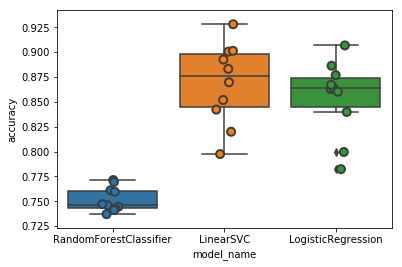

In [299]:
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [300]:
cv_df

model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.746099
1   RandomForestClassifier         1  0.761116
2   RandomForestClassifier         2  0.771415
3   RandomForestClassifier         3  0.769522
4   RandomForestClassifier         4  0.747159
5   RandomForestClassifier         5  0.744671
6   RandomForestClassifier         6  0.737091
7   RandomForestClassifier         7  0.742776
8   RandomForestClassifier         8  0.741110
9   RandomForestClassifier         9  0.759602
10               LinearSVC         0  0.883215
11               LinearSVC         1  0.851939
12               LinearSVC         2  0.892570
13               LinearSVC         3  0.928064
14               LinearSVC         4  0.900568
15               LinearSVC         5  0.819991
16               LinearSVC         6  0.869730
17               LinearSVC         7  0.842255
18               LinearSVC         8  0.797534
19               LinearSVC         9  0.901375
20      LogisticRegression         0  0.862884
21      LogisticRegression         1  0.864238
22      LogisticRegression         2  0.876952
23      LogisticRegression         3  0.906768
24      LogisticRegression         4  0.886364
25      LogisticRegression         5  0.799621
26      LogisticRegression         6  0.860256
27      LogisticRegression         7  0.839886
28      LogisticRegression         8  0.782361
29      LogisticRegression         9  0.867236

In [305]:
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target

k=['rbf', 'linear','poly','sigmoid']
c= range(1,100)
g=np.arange(1e-4,1e-2,0.0001)
g=g.tolist()
param_grid=dict(kernel=k, C=c, gamma=g)
print (param_grid)
svr=svm.SVC()
grid = GridSearchCV(svr, param_grid, cv=5,scoring='accuracy')
grid.fit(X, y)  
print()
print("Grid scores on development set:")
print()  
print (grid.grid_scores_)  
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print("Grid best score:")
print()
print (grid.best_score_)
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print (grid_mean_scores)

{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': range(1, 100), 'gamma': [0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007000000000000001, 0.0008, 0.0009000000000000001, 0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014000000000000002, 0.0015, 0.0016, 0.0017000000000000001, 0.0018000000000000002, 0.0019000000000000002, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.004200000000000001, 0.004300000000000001, 0.0044, 0.0045000000000000005, 0.004600000000000001, 0.0047, 0.0048000000000000004, 0.004900000000000001, 0.005, 0.0051, 0.005200000000000001, 0.005300000000000001, 0.0054, 0.0055000000000000005, 0.005600000000000001, 0.0057, 0.0058000000000000005, 0.005900000000000001, 0.006, 0.0061, 0.006200000000000001, 0.006300000000000001, 0.0064, 0.006500000000000001, 0.006600000000000001, 0.0067, 0.0068000000

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [35]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)



# Split the dataset in two equal parts
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, cruzada2.index, test_size=0.50, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'gamma': [1e-3],
                     'C': [1]},
                    {'C': [1]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
G:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
G:\Anaconda3\lib\site-packages

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001}

Grid scores on development set:

0.090 (+/-0.000) for {'C': 1, 'gamma': 0.001}
0.090 (+/-0.000) for {'C': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       490
           1       0.00      0.00      0.00       755
           2       0.54      1.00      0.70      3254
           3       0.00      0.00      0.00       148
           4       0.00      0.00      0.00      1081
           6       0.00      0.00      0.00       331

    accuracy                           0.54      6059
   macro avg       0.09      0.17      0.12      6059
weighted avg       0.29      0.54      0.38      6059


# Tuning hyper-parameters for recall



G:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
G:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best parameters set found on development set:

{'C': 1, 'gamma': 0.001}

Grid scores on development set:

0.167 (+/-0.000) for {'C': 1, 'gamma': 0.001}
0.167 (+/-0.000) for {'C': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       490
           1       0.00      0.00      0.00       755
           2       0.54      1.00      0.70      3254
           3       0.00      0.00      0.00       148
           4       0.00      0.00      0.00      1081
           6       0.00      0.00      0.00       331

    accuracy                           0.54      6059
   macro avg       0.09      0.17      0.12      6059
weighted avg       0.29      0.54      0.38      6059




G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
